# Workshop 1: ตรวจสอบโครงสร้าง RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 1),
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [ ]:
len(model.layers[0].get_weights())

2

In [ ]:
for wi in model.layers[0].get_weights():
  print(wi.shape, wi)

(1, 1) [[-1.0436366]]
(1,) [0.]


In [ ]:
from tensorflow.keras.utils import plot_model

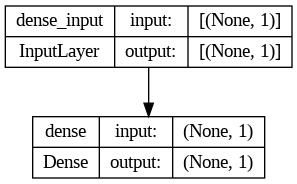

In [ ]:
plot_model(model, 'MLP1.png', show_shapes=True, show_layer_names=True)

## RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=1, input_shape=(1, 1), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


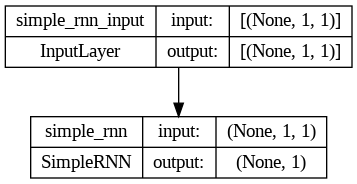

In [ ]:
plot_model(model, 'rnn1.png', show_shapes=True, show_layer_names=True)

In [ ]:
for wi in model.layers[0].get_weights():
  print(wi.shape, wi)

(1, 1) [[-0.60415816]]
(1, 1) [[1.]]
(1,) [0.]


# Workshop 2: สร้าง RNN อย่างง่าย

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
pitch = 20
step = 1
N = 100
n_train = int(N * 0.7)

def gen_data(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)
y = [gen_data(i) for i in t]

y = np.array(y)

print(y[:15])

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75]


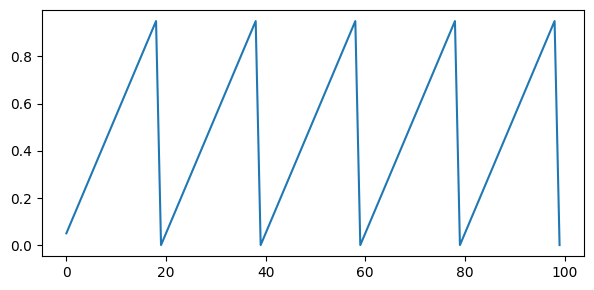

In [ ]:
plt.figure(figsize=(7, 3.2))
plt.plot(y)
plt.show()

## เตรียมข้อมูล

In [ ]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

In [ ]:
train, test = y[0:n_train], y[n_train:N]

In [ ]:
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train etest (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train etest (after conversion): (69, 1) (29, 1)


## สร้าง Model

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


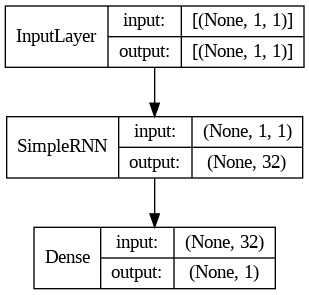

In [ ]:
plot_model(model, 'my_rnn.png', show_shapes=True, show_layer_names=False)

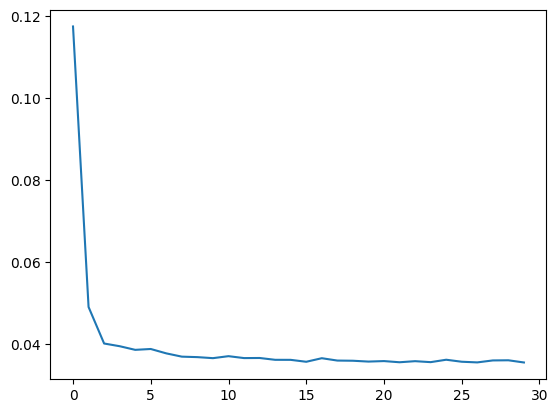

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

plt.plot(history.history['loss'])
plt.show()

## พล็อตดูผล

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0)
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict, testPredict), axis=0)

1/1 [==============================] - 0s 23ms/step


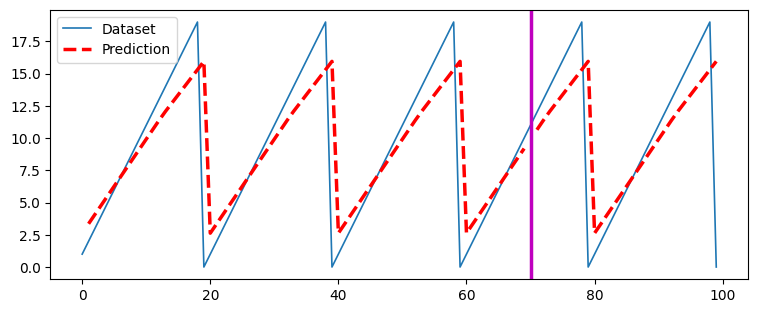

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.plot(y * pitch, lw=1.2, label="Dataset")
plt.plot(predicted * pitch, 'r--', lw=2.5, label="Prediction")
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

## ทำการ Predict

In [ ]:
new_x = 10
new_x = np.array(new_x).reshape(1, 1)
pred = model.predict(new_x / pitch)
predicted = pred * pred
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.49579272]]


# Workshop 3: สร้าง RNN ค่า Step > 1

In [ ]:
pitch = 5
step = 2
N = 100
n_train = int(N * 0.7)

def gen_data(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)
y = [gen_data(i) for i in t]

y = np.array(y)

print(y[:15])

[0.2 0.4 0.6 0.8 0.  0.2 0.4 0.6 0.8 0.  0.2 0.4 0.6 0.8 0. ]


In [ ]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

In [ ]:
train, test = y[0:n_train], y[n_train:N]

In [ ]:
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train etest (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train etest (after conversion): (68, 2) (28, 2)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


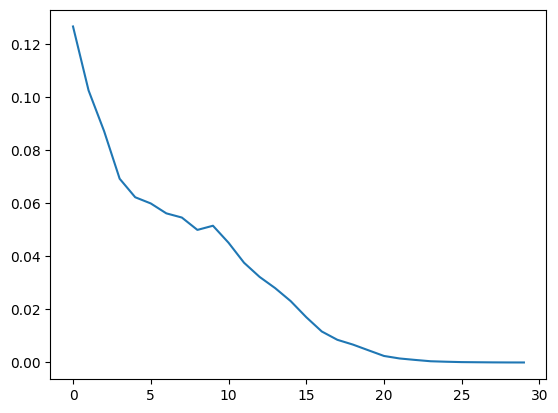

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

plt.plot(history.history['loss'])
plt.show()

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0)
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict, testPredict), axis=0)

1/1 [==============================] - 0s 21ms/step


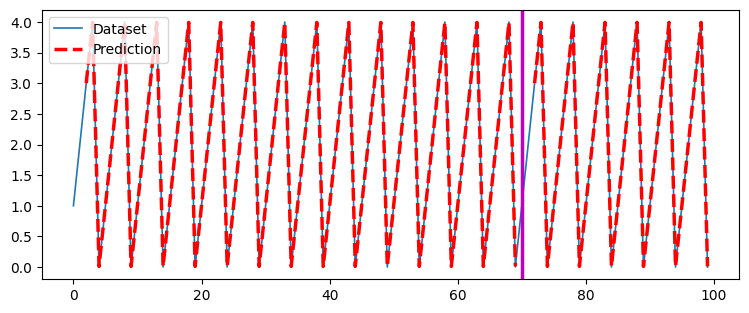

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.plot(y * pitch, lw=1.2, label="Dataset")
plt.plot(predicted * pitch, 'r--', lw=2.5, label="Prediction")
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

# Workshop 4: พยากรณ์ยอดขายล่วงหน้าด้วย LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, usecols=['Sales'])
df.head()

,Sales
0,6550
1,8728
2,12026
3,14395
4,14587


In [ ]:
df.isnull().sum()

Sales    0
dtype: int64

In [ ]:
df.shape

(108, 1)

In [ ]:
n_train = int(df.shape[0] * 0.8)
n_train

86

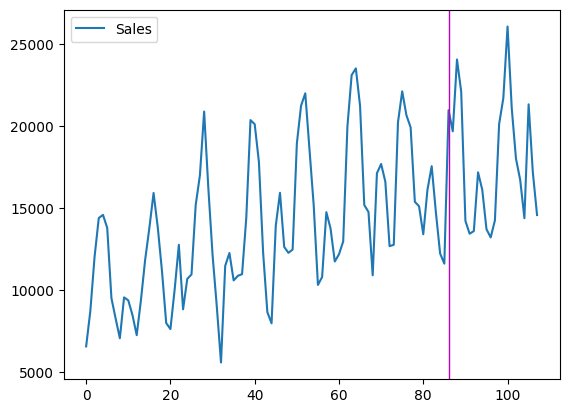

In [ ]:
df.plot()
plt.axvline(n_train, c='m', lw=1.0)
plt.show()

## เตรียมข้อมูล

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:5]

array([[0.04783011],
       [0.15391359],
       [0.31454873],
       [0.42993522],
       [0.43928693]])

In [ ]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

In [ ]:
train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape

((86, 1), (22, 1))

In [ ]:
step = 1

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('Train Test (after conversion):', X_train.shape, X_test.shape)

Train Test (after conversion): (85, 1, 1) (21, 1, 1)


In [ ]:
y_train.shape, y_test.shape

((85, 1), (21, 1))

## สร้าง Model

In [ ]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

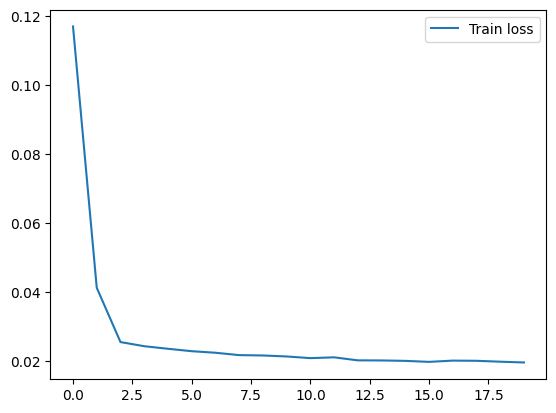

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

0.027653969824314117


In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
trainPredict_inv = sc.inverse_transform(trainPredict)
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, trainPredict_inv)
r2_test = r2_score(y_test_inv, testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Train: {:.3f}'.format(r2_train))
print('R2 Test: {:.3f}'.format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Train: 0.547
R2 Test: 0.188
RMSE Train: 2850.894
RMSE Test: 3414.199


In [ ]:
prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict_inv = np.concatenate((prefix, trainPredict_inv), axis=0)
testPredict_inv = np.concatenate((prefix, testPredict_inv), axis=0)

predicted_inv = np.concatenate((trainPredict_inv, testPredict_inv), axis=0)

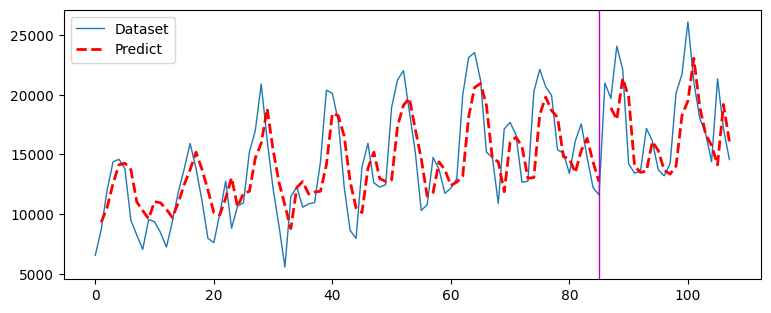

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.plot(df.values, lw=1.0, label="Dataset")
plt.plot(predicted_inv, 'r--', lw=2.0, label="Predict")
plt.axvline(n_train-step, c='m', lw=1.0)
plt.legend(loc=2)
plt.show()

## Predict

In [ ]:
X_input = X_train[-step:]

pred = model.predict(X_input)
pred_inv = sc.inverse_transform(pred)

print('Prediction:', pred_inv[-1][-1])

1/1 [==============================] - 0s 21ms/step
Prediction: 12714.173


In [ ]:
end = X_train.shape[0] + 1
n_back = 6
avg_cal = df[end-n_back-1:end-1].sum() / df[end-n_back-1:end-1].count()
avg_cal = avg_cal[0]
print('Estimate the Average:', avg_cal.round(2))

Estimate the Average: 14859.33


In [ ]:
y_true = y_train[-1].reshape(-1, 1)
y_true = sc.inverse_transform(y_true)
y_true = np.squeeze(y_true)
print('Actual:', y_true)

Actual: 11608.0


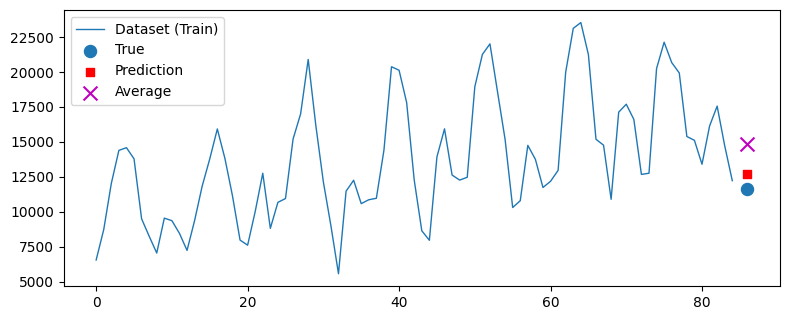

In [ ]:
h_axis = X_train.shape[0] + 1
train_inv = sc.inverse_transform(train)

plt.figure(figsize=(8, 3.3))
plt.plot(df[:n_train-step], lw=1.0, label='Dataset (Train)')
plt.scatter(h_axis, y_true, s=75, label='True')
plt.scatter(h_axis, pred_inv[-1], c='r', marker='s', s=40, label='Prediction')
plt.scatter(h_axis, avg_cal, c='m', marker='x', s=100, label='Average')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X = df.index.values.reshape(-1, 1)
y = df.values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

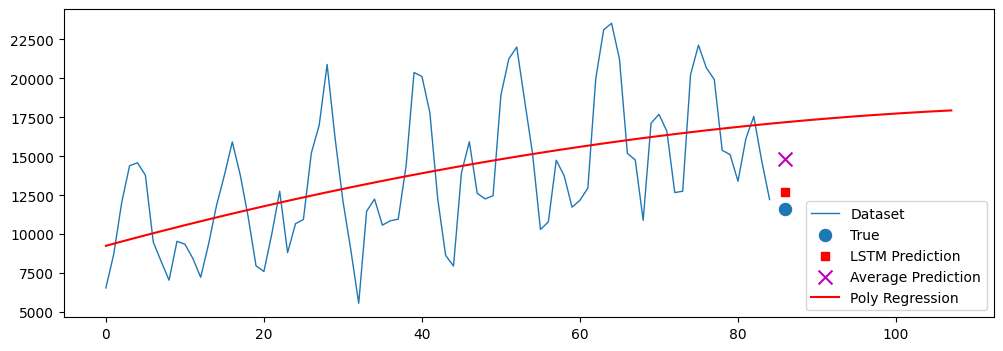

In [ ]:
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(x_poly, y)

h_axis = X_train.shape[0] + 1
y_poly_pred = model_poly.predict(x_poly)

train_inv = sc.inverse_transform(train)

plt.figure(figsize=(12, 4))
plt.plot(df[:n_train-step], lw=1.0, label='Dataset')
plt.scatter(h_axis, y_true, s=75, label='True')
plt.scatter(h_axis, pred_inv[-1], c='r', marker='s', s=40, label='LSTM Prediction')
plt.scatter(h_axis, avg_cal, c='m', marker='x', s=100, label='Average Prediction')
plt.plot(X, y_poly_pred, lw=1.5, color='r', label='Poly Regression')
plt.legend(loc=4)
plt.show()

In [ ]:
x_input = [[109]]
y_poly_pred2 = model_poly.predict(poly_features.fit_transform(x_input))
y_poly_pred2 = np.squeeze(y_poly_pred2)

print('Actual data:', y_true)
print('LSTM Prediction:', pred_inv[-1][-1].round(2))
print('Poly Regression:', y_poly_pred2.round(2))
print('Average Prediction:', avg_cal.round(2))

Actual data: 11608.0
LSTM Prediction: 12714.17
Poly Regression: 17995.1
Average Prediction: 14859.33


# Workshop 5: LSTM หลายชั้น

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, usecols=['Sales'])

n_train = int(df.shape[0] * 0.8)

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)

def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

train, test = data_sc[0:n_train], data_sc[n_train:]

step = 1

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

In [ ]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation="relu", return_sequences=True))
model.add(LSTM(units=32, activation="relu", return_sequences=True))
model.add(LSTM(units=32, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=15, batch_size=1, verbose=0)

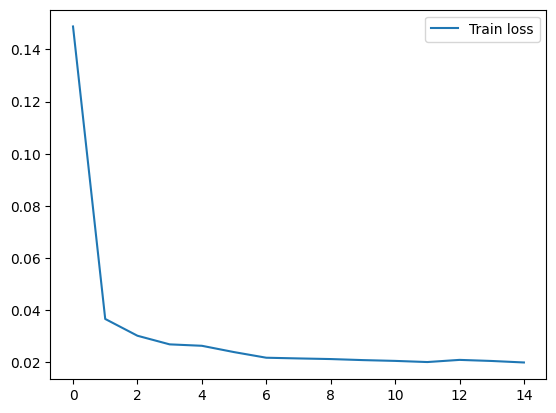

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

0.033248793333768845


In [ ]:
X_input = X_train[-step:]

pred = model.predict(X_input)
pred_inv = sc.inverse_transform(pred)

print('Prediction:', pred_inv[-1][-1])

1/1 [==============================] - 0s 432ms/step
Prediction: 12063.793


# Workshop 6: GRU พยากรณ์ราคาหุ้น

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/IBM_2006-01-01_to_2018-01-01.csv')
df.index = pd.to_datetime(df.index)
df.head()

,Date,Open,High,Low,Close,Volume,Name
1970-01-01 00:00:00.000000000,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1970-01-01 00:00:00.000000001,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
1970-01-01 00:00:00.000000002,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
1970-01-01 00:00:00.000000003,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
1970-01-01 00:00:00.000000004,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## เตรียมและตรวจดูข้อมูลเบื้องต้น

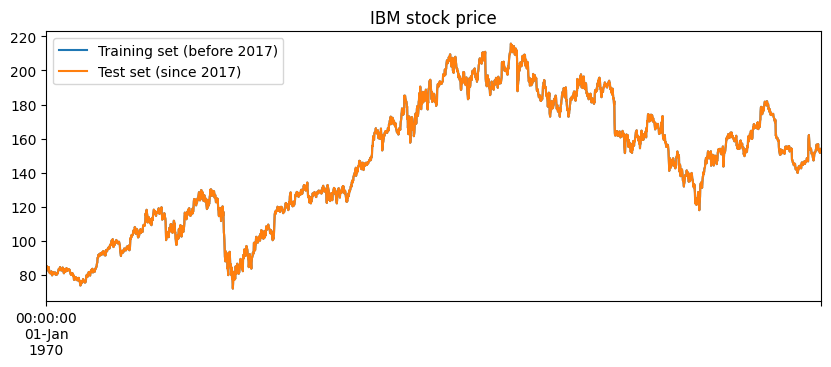

In [4]:
df.isnull().sum()

df = df.Close
df.head()

df[:'2016'].plot(figsize=(10, 3.5), legend=True)
df[:'2017'].plot(figsize=(10, 3.5), legend=True)
plt.legend(['Training set (before 2017)', 'Test set (since 2017)'])
plt.title('IBM stock price')
plt.show()

In [5]:
print('Samples:', df.shape)
print('Train set:', df[:'2016'].shape)

Samples: (3020,)
Train set: (3020,)


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = df.values.reshape(-1, 1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)
data_sc[:5]

array([[0.07163682],
       [0.07087325],
       [0.0746911 ],
       [0.0916979 ],
       [0.08322921]])

In [11]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

n_train = 2769

train, test = data_sc[:n_train], data_sc[n_train:]
train.shape, test.shape

((2769, 1), (251, 1))

In [12]:
step = 60

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('X train, Test (after conversion):', X_train.shape, X_test.shape)
print('y train, Test (after conversion):', y_train.shape, y_test.shape)

X train, Test (after conversion): (2709, 60, 1) (191, 60, 1)
y train, Test (after conversion): (2709, 1) (191, 1)


## สร้าง Model

In [13]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 40)                11040     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 19,031
Trainable params: 19,031
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
85/85 [==============================] - 7s 54ms/step - loss: 0.0399
Epoch 2/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0082
Epoch 3/50
85/85 [==============================] - 7s 85ms/step - loss: 0.0074
Epoch 4/50
85/85 [==============================] - 6s 75ms/step - loss: 0.0059
Epoch 5/50
85/85 [==============================] - 5s 56ms/step - loss: 0.0057
Epoch 6/50
85/85 [==============================] - 3s 40ms/step - loss: 0.0053
Epoch 7/50
85/85 [==============================] - 7s 87ms/step - loss: 0.0045
Epoch 8/50
85/85 [==============================] - 5s 58ms/step - loss: 0.0044
Epoch 9/50
85/85 [==============================] - 7s 84ms/step - loss: 0.0041
Epoch 10/50
85/85 [==============================] - 5s 59ms/step - loss: 0.0039
Epoch 11/50
85/85 [==============================] - 6s 74ms/step - loss: 0.0036
Epoch 12/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0036
Epoch 13/50
85/85 [==================

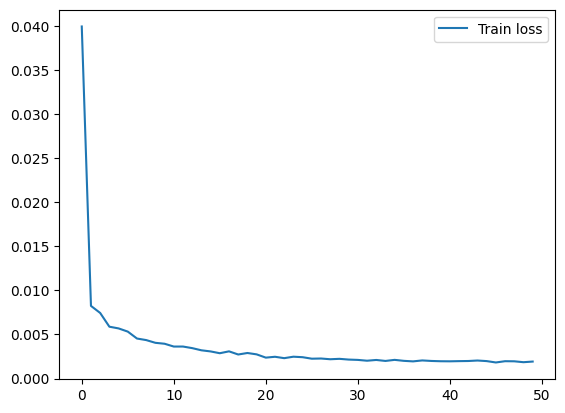

In [15]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [16]:
testPredict = model.predict(X_test)

6/6 [==============================] - 1s 22ms/step


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE2 Test: {:.3f}'.format(rmse_test))

R2 Test: 0.903
RMSE2 Test: 2.323


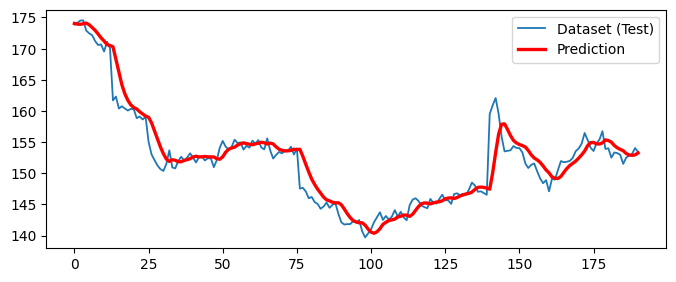

In [21]:
plt.figure(figsize=(12-4, 3.1))
plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')
plt.plot(testPredict_inv, 'r', lw=2.4, label='Prediction')
plt.legend()
plt.show()

In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                14560     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 25,001
Trainable params: 25,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
85/85 [==============================] - 6s 40ms/step - loss: 0.0486
Epoch 2/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0117
Epoch 3/50
85/85 [==============================] - 6s 73ms/step - loss: 0.0097
Epoch 4/50
85/85 [==============================] - 3s 39ms/step - loss: 0.0078
Epoch 5/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0076
Epoch 6/50
85/85 [==============================] - 4s 50ms/step - loss: 0.0072
Epoch 7/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0058
Epoch 8/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0057
Epoch 9/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0055
Epoch 10/50
85/85 [==============================] - 4s 49ms/step - loss: 0.0050
Epoch 11/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0044
Epoch 12/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0046
Epoch 13/50
85/85 [==================

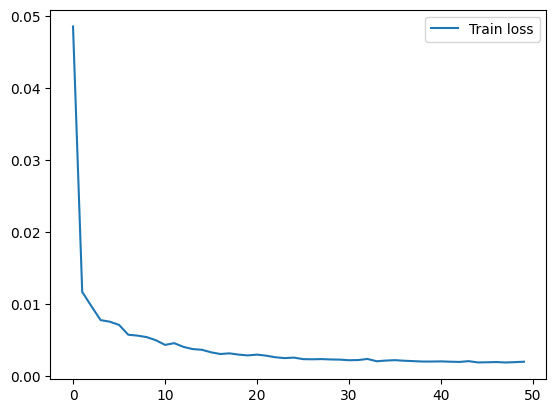

In [27]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [28]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

6/6 [==============================] - 0s 10ms/step


In [29]:
testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE2 Test: {:.3f}'.format(rmse_test))

R2 Test: 0.521
RMSE2 Test: 5.150


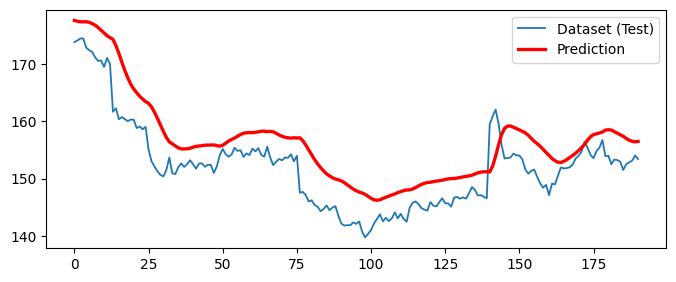

In [30]:
plt.figure(figsize=(12-4, 3.1))
plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')
plt.plot(testPredict_inv, 'r', lw=2.4, label='Prediction')
plt.legend()
plt.show()